## Titanic Dataset Code with Output

=== Part 1: Simple Hebb Example with (1,0,1,0) ===

Iteration 1:
Input X: [1 0 1 0]
Old Weights: [1. 1. 1. 1.], Bias: 1.0
Net input (sum(w*x)+b-theta): 1.0
Predicted Output (after threshold): 1, Target: 1
ΔW: [1 0 1 0], New Weights: [2. 1. 2. 1.], New Bias: 2.0

Iteration 2:
Input X: [1 0 1 0]
Old Weights: [2. 1. 2. 1.], Bias: 2.0
Net input (sum(w*x)+b-theta): 4.0
Predicted Output (after threshold): 1, Target: 1
ΔW: [1 0 1 0], New Weights: [3. 1. 3. 1.], New Bias: 3.0

Demo Hebb Table:
   X1  X2  X3  X4  ΔW1  ΔW2  ΔW3  ΔW4  W1new  W2new  W3new  W4new  Bnew
0   1   0   1   0    1    0    1    0    2.0    1.0    2.0    1.0   2.0
1   1   0   1   0    1    0    1    0    3.0    1.0    3.0    1.0   3.0

=== Part 2: Hebb Network with 1000 Samples ===

--- Epoch 1 ---

--- Epoch 2 ---

Training Log (Top 10 rows):
         X1        X2        X3        X4        W1        W2        W3  \
0 -1.076548 -0.525394 -0.846721  1.052443  0.000000  0.000000  0.000000   
1  0.943660  1.893520  0.822939 

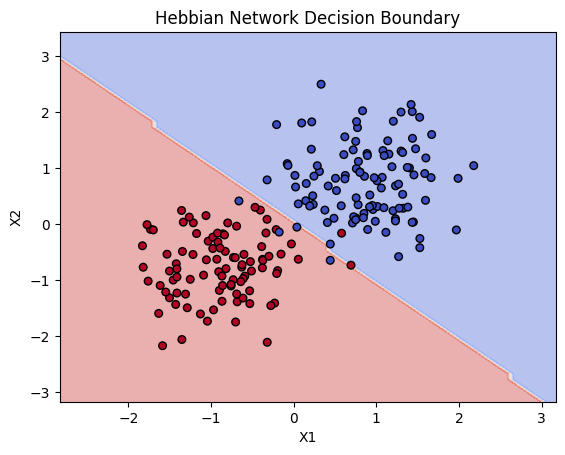

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("=== Part 1: Simple Hebb Example with (1,0,1,0) ===")

X = np.array([[1,0,1,0],
              [1,0,1,0]])
y = np.array([1,1])

weights = np.array([1,1,1,1], dtype=float)
bias = 1.0
theta = 2

logs_demo = []
for i in range(len(X)):
    x = X[i]
    target = y[i]

    print(f"\nIteration {i+1}:")
    print(f"Input X: {x}")
    print(f"Old Weights: {weights}, Bias: {bias}")

    net = np.dot(weights, x) + bias - theta
    print(f"Net input (sum(w*x)+b-theta): {net}")

    output = 1 if net >= 0 else 0
    print(f"Predicted Output (after threshold): {output}, Target: {target}")

    delta_w = target * x
    weights = weights + delta_w
    bias = bias + target
    print(f"ΔW: {delta_w}, New Weights: {weights}, New Bias: {bias}")

    logs_demo.append([x[0],x[1],x[2],x[3],
                      delta_w[0],delta_w[1],delta_w[2],delta_w[3],
                      weights[0],weights[1],weights[2],weights[3],bias])

df_demo = pd.DataFrame(logs_demo, columns=[
    "X1","X2","X3","X4","ΔW1","ΔW2","ΔW3","ΔW4","W1new","W2new","W3new","W4new","Bnew"])
print("\nDemo Hebb Table:")
print(df_demo)

print("\n=== Part 2: Hebb Network with 1000 Samples ===")

class HebbNetwork:
    def __init__(self, num_inputs, learning_rate=1.0):
        self.weights = np.zeros(num_inputs)
        self.bias = 0.0
        self.learning_rate = learning_rate

    def predict(self, x):
        activation = np.dot(x, self.weights) + self.bias
        return 1 if activation >= 0 else -1

    def train(self, X, y, epochs=5):
        logs = []
        for epoch in range(epochs):
            print(f"\n--- Epoch {epoch+1} ---")
            for i in range(len(X)):
                x = X[i]
                target = y[i]

                old_weights = self.weights.copy()
                old_bias = self.bias

                # print(f"\nSample {i+1}:")
                # print(f"Input X: {x}, Target: {target}")
                # print(f"Old Weights: {old_weights}, Old Bias: {old_bias}")

                delta_w = self.learning_rate * target * x
                self.weights += delta_w
                self.bias += self.learning_rate * target

                # print(f"ΔW: {delta_w}, New Weights: {self.weights}, New Bias: {self.bias}")


                logs.append([
                    x[0], x[1], x[2], x[3],
                    old_weights[0], old_weights[1], old_weights[2], old_weights[3], old_bias,
                    delta_w[0], delta_w[1], delta_w[2], delta_w[3],
                    self.weights[0], self.weights[1], self.weights[2], self.weights[3], self.bias
                ])
        return logs

X, y = make_blobs(n_samples=1000, n_features=4, centers=2, cluster_std=2, random_state=23)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.where(y==0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)

hebb = HebbNetwork(num_inputs=4, learning_rate=0.01)
logs = hebb.train(X_train, y_train, epochs=2)

columns = ["X1","X2","X3","X4",
           "W1","W2","W3","W4","B",
           "ΔW1","ΔW2","ΔW3","ΔW4",
           "W1new","W2new","W3new","W4new","Bnew"]
df = pd.DataFrame(logs, columns=columns)

print("\nTraining Log (Top 10 rows):")
print(df.head(10))

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = []
    for i in range(xx.shape[0]):
        row = []
        for j in range(xx.shape[1]):
            point = np.array([xx[i, j], yy[i, j], 0, 0])
            row.append(model.predict(point))
        Z.append(row)
    Z = np.array(Z)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Hebbian Network Decision Boundary")
    plt.show()

plot_decision_boundary(hebb, X_test, y_test)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


In [ ]:
titanic = sns.load_dataset('titanic')


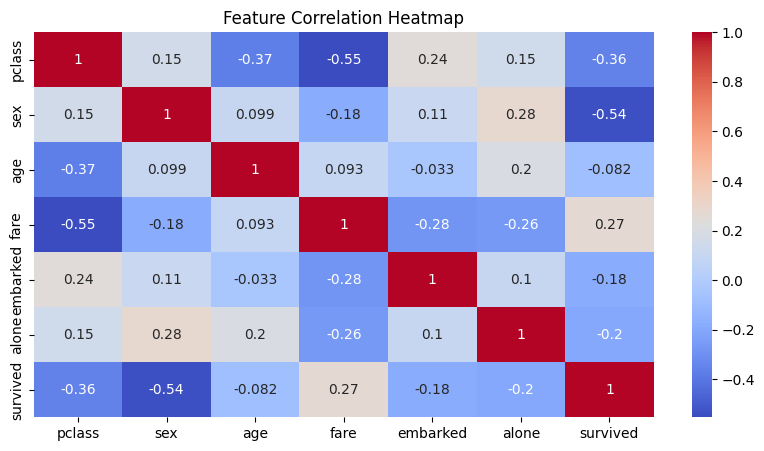

In [ ]:
df = titanic[["pclass", "sex", "age", "fare", "embarked", "alone", "survived"]]

df = df.dropna()

le_sex = LabelEncoder()
le_emb = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])
df["embarked"] = le_emb.fit_transform(df["embarked"])

X = df.drop("survived", axis=1).values
y = df["survived"].values
y = np.where(y == 0, -1, 1)

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
class HebbianPerceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        self.weights = np.zeros(num_inputs)
        self.bias = 0.0
        self.lr = learning_rate

    def predict(self, x):
        return 1 if np.dot(self.weights, x) + self.bias >= 0 else -1

    def train(self, X, y, epochs=5):
        for epoch in range(epochs):
            for i in range(len(X)):
                xi, target = X[i], y[i]
                self.weights += self.lr * target * xi
                self.bias += self.lr * target

In [ ]:
model = HebbianPerceptron(num_inputs=X_train.shape[1], learning_rate=0.01)


In [ ]:
model.train(X_train, y_train, epochs=20)


In [ ]:
print(df.size)

4984


In [ ]:
y_pred_train = [model.predict(x) for x in X_train]
y_pred_test = [model.predict(x) for x in X_test]

y_train_true = np.where(y_train==-1,0,1)
y_test_true = np.where(y_test==-1,0,1)
y_pred_train = np.where(np.array(y_pred_train)==-1,0,1)
y_pred_test = np.where(np.array(y_pred_test)==-1,0,1)

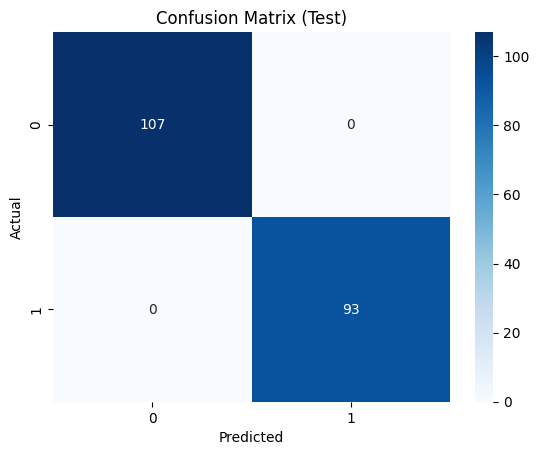

In [ ]:
cm = confusion_matrix(y_test_true, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
precision = precision_score(y_test_true, y_pred_test)
recall = recall_score(y_test_true, y_pred_test)
f1 = f1_score(y_test_true, y_pred_test)
train_acc = np.mean(y_train_true == y_pred_train)
test_acc = np.mean(y_test_true == y_pred_test)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Training Accuracy: 0.999
Test Accuracy: 1.000


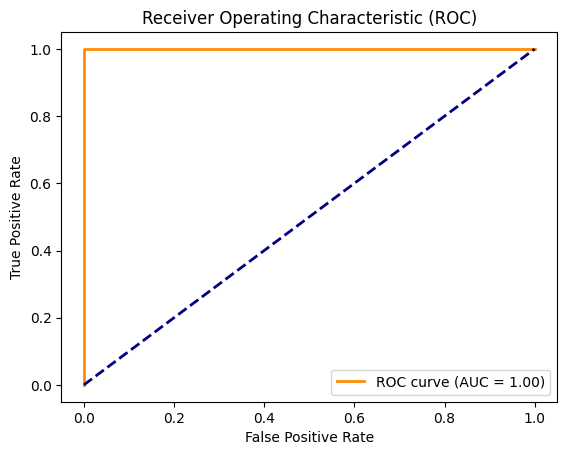

In [ ]:
fpr, tpr, _ = roc_curve(y_test_true, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load and normalize dataset
data = load_breast_cancer()
X = data.data              # shape (569, 30)
y = data.target            # 0 or 1 labels
X_min = X.min(axis=0); X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)  # scale features to [0,1]

# Define network architecture
n_input  = X_norm.shape[1]  # 30 features
n_hidden = 5
n_output = 1
np.random.seed(42)
W_input_hidden  = np.random.normal(scale=0.1, size=(n_input,  n_hidden))
b_hidden        = np.zeros(n_hidden)
W_hidden_output = np.random.normal(scale=0.1, size=(n_hidden, n_output))
b_output        = np.zeros(n_output)

# Activation functions (sigmoid and its derivative)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def sigmoid_derivative(y):
    return y * (1.0 - y)

# Training parameters
learning_rate = 0.1
epochs = 1000

# Training loop (stochastic SGD)
for epoch in range(epochs):
    total_loss = 0.0
    for i in range(X_norm.shape[0]):
        x_i = X_norm[i]             # input vector
        t_i = y[i]                  # target label

        # --- Forward pass ---
        # Step 5: hidden layer net input and output
        z_hidden = np.dot(x_i, W_input_hidden) + b_hidden  # (n_hidden,)
        a_hidden = sigmoid(z_hidden)                       # (n_hidden,)
        # Step 6: output layer net input and output
        z_out    = np.dot(a_hidden, W_hidden_output) + b_output  # (1,)
        a_out    = sigmoid(z_out)                                 # (1,)

        # --- Compute error at output ---
        error = t_i - a_out[0]            # scalar error
        total_loss += error**2

        # --- Backward pass ---
        # Step 8: output layer delta
        delta_out = error * sigmoid_derivative(a_out)[0]  # scalar

        # Step 9: Update hidden->output weights and bias
        grad_hidden_output = np.expand_dims(a_hidden,1) * delta_out  # (n_hidden,1)
        W_hidden_output += learning_rate * grad_hidden_output
        b_output         += learning_rate * delta_out

        # Step 10: Compute hidden layer deltas
        # W_hidden_output.flatten() has shape (n_hidden,)
        delta_hidden = (W_hidden_output.flatten() * delta_out) * sigmoid_derivative(a_hidden)  # (n_hidden,)

        # Step 11: Update input->hidden weights and bias
        grad_input_hidden = np.outer(x_i, delta_hidden)  # (n_input, n_hidden)
        W_input_hidden  += learning_rate * grad_input_hidden
        b_hidden        += learning_rate * delta_hidden

    # Print MSE every 100 epochs
    if epoch % 100 == 0 or epoch == epochs-1:
        mse = total_loss / X_norm.shape[0]
        print(f"Epoch {epoch:4d}, MSE = {mse:.4f}")


Epoch    0, MSE = 0.2181
Epoch  100, MSE = 0.0181
Epoch  200, MSE = 0.0151
Epoch  300, MSE = 0.0139
Epoch  400, MSE = 0.0131
Epoch  500, MSE = 0.0126
Epoch  600, MSE = 0.0122
Epoch  700, MSE = 0.0118
Epoch  800, MSE = 0.0115
Epoch  900, MSE = 0.0112
Epoch  999, MSE = 0.0109


Epoch    0, MSE = 0.2181
Epoch  100, MSE = 0.0181
Epoch  200, MSE = 0.0151
Epoch  300, MSE = 0.0139
Epoch  400, MSE = 0.0131
Epoch  500, MSE = 0.0126
Epoch  600, MSE = 0.0122
Epoch  700, MSE = 0.0118
Epoch  800, MSE = 0.0115
Epoch  900, MSE = 0.0112
Epoch  999, MSE = 0.0109


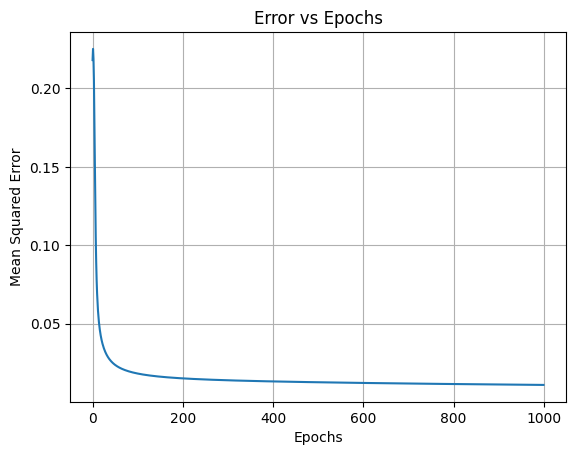

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
X_min = X.min(axis=0); X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)

n_input  = X_norm.shape[1]
n_hidden = 5
n_output = 1
np.random.seed(42)
W_input_hidden  = np.random.normal(scale=0.1, size=(n_input,  n_hidden))
b_hidden        = np.zeros(n_hidden)
W_hidden_output = np.random.normal(scale=0.1, size=(n_hidden, n_output))
b_output        = np.zeros(n_output)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def sigmoid_derivative(y):
    return y * (1.0 - y)

learning_rate = 0.1
epochs = 1000
loss_history = []

for epoch in range(epochs):
    total_loss = 0.0
    for i in range(X_norm.shape[0]):
        x_i = X_norm[i]
        t_i = y[i]

        z_hidden = np.dot(x_i, W_input_hidden) + b_hidden
        a_hidden = sigmoid(z_hidden)
        z_out    = np.dot(a_hidden, W_hidden_output) + b_output
        a_out    = sigmoid(z_out)

        error = t_i - a_out[0]
        total_loss += error**2

        delta_out = error * sigmoid_derivative(a_out)[0]
        grad_hidden_output = np.expand_dims(a_hidden,1) * delta_out
        W_hidden_output += learning_rate * grad_hidden_output
        b_output         += learning_rate * delta_out

        delta_hidden = (W_hidden_output.flatten() * delta_out) * sigmoid_derivative(a_hidden)
        grad_input_hidden = np.outer(x_i, delta_hidden)
        W_input_hidden  += learning_rate * grad_input_hidden
        b_hidden        += learning_rate * delta_hidden

    mse = total_loss / X_norm.shape[0]
    loss_history.append(mse)
    if epoch % 100 == 0 or epoch == epochs-1:
        print(f"Epoch {epoch:4d}, MSE = {mse:.4f}")

plt.plot(range(epochs), loss_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Error vs Epochs")
plt.grid(True)
plt.show()


In [ ]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

np.random.seed(1)
W_input_hidden  = np.random.uniform(-1,1,(2, 2))
b_hidden        = np.random.uniform(-1,1,2)
W_hidden_output = np.random.uniform(-1,1,(2, 1))
b_output        = np.random.uniform(-1,1,1)

def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(y): return y*(1-y)

learning_rate = 0.5
epochs = 10000

for epoch in range(epochs):
    total_loss = 0.0
    for i in range(X_xor.shape[0]):
        x_i = X_xor[i]
        t_i = y_xor[i]

        z_hidden = np.dot(x_i, W_input_hidden) + b_hidden
        a_hidden = sigmoid(z_hidden)
        z_out    = np.dot(a_hidden, W_hidden_output) + b_output
        a_out    = sigmoid(z_out)

        error = t_i - a_out[0]
        total_loss += error**2
        delta_out = error * sigmoid_derivative(a_out)[0]

        grad_hidden_output = np.expand_dims(a_hidden,1) * delta_out
        W_hidden_output += learning_rate * grad_hidden_output
        b_output        += learning_rate * delta_out

        delta_hidden = (W_hidden_output.flatten() * delta_out) * sigmoid_derivative(a_hidden)
        grad_input_hidden = np.outer(x_i, delta_hidden)
        W_input_hidden += learning_rate * grad_input_hidden
        b_hidden       += learning_rate * delta_hidden

    if epoch % 2000 == 0:
        mse = total_loss / X_xor.shape[0]
        print(f"Epoch {epoch:4d}, MSE = {mse:.6f}")

print("\nFinal network outputs for XOR:")
for x_i, t_i in zip(X_xor, y_xor):
    a_hidden = sigmoid(np.dot(x_i, W_input_hidden) + b_hidden)
    a_out    = sigmoid(np.dot(a_hidden, W_hidden_output) + b_output)[0]
    print(f"Input {x_i.tolist()} -> Predicted {a_out:.3f}, Target {t_i}")


Epoch    0, MSE = 0.269411
Epoch 2000, MSE = 0.004854
Epoch 4000, MSE = 0.001108
Epoch 6000, MSE = 0.000607
Epoch 8000, MSE = 0.000414

Final network outputs for XOR:
Input [0, 0] -> Predicted 0.016, Target 0
Input [0, 1] -> Predicted 0.983, Target 1
Input [1, 0] -> Predicted 0.983, Target 1
Input [1, 1] -> Predicted 0.021, Target 0
